In [3]:
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import os
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image

In [4]:
# Load and prepare Titanic data
os.chdir('C:\\Kraggle\\titanic') # Set working directory

train_set = pd.read_csv("train.csv")    # Read the data
test_set = pd.read_csv("test.csv")    # Read the data

In [5]:
train_set.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# Count missing instances in Age column:
print ('Number of missing instances in Age columns:', sum(train_set['Age'].isnull()))
print ('Percent of missing instances in Age Column:', sum(1.0 * train_set['Age'].isnull())/len(train_set.index)*100)
print 

Number of missing instances in Age columns: 177
Percent of missing instances in Age Column: 19.8653198653


<function print>

In [7]:
# Count missing instances in Cabin column:
print ('Number of missing instances in Cabin columns:', sum(train_set['Cabin'].isnull()))
print ('Percent of missing instances in Cabin Column:', sum(1.0 * train_set['Cabin'].isnull())/len(train_set.index)*100)
print 

Number of missing instances in Cabin columns: 687
Percent of missing instances in Cabin Column: 77.1043771044


<function print>

In [8]:
# Count missing instances in Embarked column:
print ('Number of missing instances in Embarked columns:', sum(train_set['Embarked'].isnull()))
print ('Percent of missing instances in Embarked Column:', sum(1.0 * train_set['Embarked'].isnull())/len(train_set.index)*100)
print 

Number of missing instances in Embarked columns: 2
Percent of missing instances in Embarked Column: 0.224466891134


<function print>

In [9]:
print("===== survived by class, sex and age")
print(train_set.groupby(["Pclass", "Sex", "Age"])["Survived"].value_counts(normalize=True))

===== survived by class, sex and age
Pclass  Sex     Age   Survived
1       female  2.0   0           1.00
                14.0  1           1.00
                15.0  1           1.00
                16.0  1           1.00
                17.0  1           1.00
                18.0  1           1.00
                19.0  1           1.00
                21.0  1           1.00
                22.0  1           1.00
                23.0  1           1.00
                24.0  1           1.00
                25.0  0           1.00
                26.0  1           1.00
                29.0  1           1.00
                30.0  1           1.00
                31.0  1           1.00
                32.0  1           1.00
                33.0  1           1.00
                35.0  1           1.00
                36.0  1           1.00
                38.0  1           1.00
                39.0  1           1.00
                40.0  1           1.00
                41.0  1           1

In [10]:
age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
train_set["AgeR"] = pd.cut(train_set["Age"].fillna(-1), bins=age_bins).astype(object)

In [11]:
describe_fields = ["Age", "Sex", "Pclass", "Parch", "Fare", "Embarked"]

print("===== train: female")
print(train_set[train_set["Sex"] == "female"][describe_fields].describe())

===== train: female
              Age      Pclass       Parch        Fare
count  261.000000  314.000000  314.000000  314.000000
mean    27.915709    2.159236    0.649682   44.479818
std     14.110146    0.857290    1.022846   57.997698
min      0.750000    1.000000    0.000000    6.750000
25%     18.000000    1.000000    0.000000   12.071875
50%     27.000000    2.000000    0.000000   23.000000
75%     37.000000    3.000000    1.000000   55.000000
max     63.000000    3.000000    6.000000  512.329200


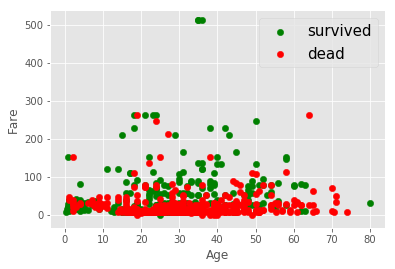

In [12]:
#plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train_set[train_set['Survived']==1]['Age'],train_set[train_set['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train_set[train_set['Survived']==0]['Age'],train_set[train_set['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.show()


In [13]:
#Nettoyage des données => remplacement des valeurs NULL
#Embarked NaN => U
train_set['Clean_Embarked']=train_set['Embarked']
train_set['Clean_Embarked'].fillna('U',inplace=True)
#Age NaN => moyenne de l'age par sex de la class
train_set['Clean_Age']=train_set['Age']
train_set['Clean_Age'].fillna(train_set['Age'].median(),inplace=True)
#Fare NaN => Moyenne de la Classe
train_set['Clean_Fare']=train_set['Fare']
train_set['Clean_Fare'].fillna(train_set['Fare'].median(),inplace=True)

In [14]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(train_set["Sex"])

#Convert Clean_Embarked variable to numeric
encoded_embarked = label_encoder.fit_transform(train_set["Clean_Embarked"])


# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = train_set["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
# Save tree as dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, 
                              feature_names=["Sex"], 
                              out_file=f)


#Image("tree1.dot")               # Display image*

In [16]:

# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], train_set["Sex"])



Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


In [17]:
# Make data frame of predictors
predictors = pd.DataFrame([encoded_sex, train_set["Pclass"]]).T

# Train the model
tree_model.fit(X = predictors, 
               y = train_set["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
with open("tree2.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, 
                              feature_names=["Sex", "Class"], 
                              out_file=f)

In [19]:
#Image("tree2.dot")  

In [20]:
# Get survival probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions by sex and class
pd.crosstab(preds[:,0], columns = [train_set["Pclass"], 
                                   train_set["Sex"]])



Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [21]:


predictors = pd.DataFrame([encoded_sex, train_set["Pclass"], train_set["Clean_Age"], encoded_embarked, train_set["Clean_Fare"]]).T

# Initialize model with maximum tree depth set to 8
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, y = train_set["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
with open("tree3.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, feature_names=["Sex", "Class","Age","Embarked", "Fare"], out_file=f)



In [23]:
#Image("tree3.dot")  

In [24]:
tree_model.score(X = predictors, y = train_set["Survived"])



0.89337822671156009

In [25]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [26]:
test_set.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [27]:
#Nettoyage des données => remplacement des valeurs NULL
#Age NaN => moyenne de l'age par sex de la class
test_set['Clean_Age']=test_set['Age']
test_set['Clean_Age'].fillna(test_set['Age'].median(),inplace=True)
#Fare NaN => Moyenne de la Classe
test_set['Clean_Fare']=test_set['Fare']
test_set['Clean_Fare'].fillna(test_set['Fare'].median(),inplace=True)

In [28]:
test_set.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Clean_Age      False
Clean_Fare     False
dtype: bool

In [29]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex_test = label_encoder.fit_transform(test_set["Sex"])

#Convert Clean_Embarked variable to numeric
encoded_embarked_test = label_encoder.fit_transform(test_set["Embarked"])


# Test the model
test_model = pd.DataFrame([encoded_sex_test, test_set["Pclass"], test_set["Clean_Age"], encoded_embarked_test, test_set["Clean_Fare"]]).T

# Make test set predictions
test_preds = tree_model.predict(X=test_model)

In [30]:

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":test_set["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("AXA_Salles_submission.csv", index=False)  

In [31]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
